Projeto final de Python para Ciência de Dados (EBAC - Escola Britânica de Artes Criativas e Tecnologia)

1. 1. Problemática:
    
    Vamos explorar os dados de crédito fornecidos na base de dados na base Python_M10_support material.csv, fornecida no exercício, buscando extrair, tratar e analisar os dados e obter insights. Estes dados fornecidos são de uma base de fornecimento de crédito. 
    
    para tanto, iniciaremos importando as bibliotecas necessárias:

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [77]:
df = pd.read_csv('/kaggle/input/python-m10-support-material/Python_M10_support material.csv')
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,na,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,na,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Nosso atributo de interesse é a coluna "default", que indica se um determinado cliente está inadimplente ou não, sendo que este cliente está inadimplente se o valor da coluna for '1', e está adimplente caso a coluna esteja com o valor '0'

Procuraremos relacionar as demais colunas, como idade, escolaridade, meses de relacionamento, entre outras para tentar obter insights sobre o que causa a inadimplência mostrada no dataset. 

Vamos então conhecer um pouco melhor a estrutura dos dados:

1. 2 Estrutura

In [78]:
df.shape



(10127, 16)

In [79]:
df[df['default'] == 0].shape

(8500, 16)

In [80]:
df[df['default'] == 1].shape

(1627, 16)

In [81]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f'A proporção de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')

A proporção de clientes adimplentes é de 83.93%
A proporção de clientes inadimplentes é de 16.07%


Como podemos verificar no código acima, vemos que o dataframe apresenta uma quantidade de 1627 linhas e 16 colunas. 

Ainda podemos visualizar que a proporção de clientes adimplentes e inadimplentes é de 83,93% de adimplentes e 16,07 inadimplentes. 

1. 3 Validação do Schema

    Vamos continuar explorando os dados, agora verificando a tipagem dos dados, validando-os para que possam ser manipulados:
    

In [82]:
df.head(n=5) # Extraindo algumas colunas de amostra para verificar a tipagem dos dados:


,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [83]:
df.dtypes # Verificando atributos categóricos:

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Todo dado tipo 'object' na biblioteca Pandas é considerado pelo Python como uma string. Sendo assim, já podemos verificar que duas de nossas colunas que podem se relacionar com a inadimplência (limite_de_credito e valor_transacoes_12m) estão descritas como string, e deverão ser convertidas para float antes da plotagem e análise dos gráficos, o que será feito mais a frente: 

In [84]:
df.select_dtypes('object').describe().transpose() # Verificando atributos numéricos

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [85]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Ainda analisando a planilha, vamos verificar a incidência de dados faltantes, nulos, ou qualquer outro tipo que possa atrapalhar a análise e plotagem dos gráficos mais tarde: 

In [86]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [87]:
df.isna().any() # Verificando dados faltantes: 

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Aparentemente, nenhuma coluna possui dados inválidos. Vamos criar uma função que valide estatisticamente a possibilidade de não haver nenhum dadeo inválido:

In [88]:
def dados_faltantes(df: pd.DataFrame) -> None:
    
    dados_faltantes = []
    for coluna in df.columns:
        if df[coluna].isna().any():
            qtd, _ = df[df[coluna].isna()].shape
            total, _ = df.shape
            dict_dados_faltantes = {coluna: {'quantidade': qtd, 'porcentagem' : round(100 * qtd/total, 2)}}
    for dados in dados_faltantes:
        print(dados)

In [89]:
dados_faltantes(df=df)

In [91]:
dados_faltantes(df=df[df['default'] == 0])

In [92]:
dados_faltantes(df=df[df['default'] == 1])

Como o código não imprimiu nenhum dicionário contendo os dados que são inválidos na planilha, isso confirma a linha 40, em que todas as respostas para dados inválidos estão como False, e que a base de dados está completamente e corretamente preenchida. 

Porém, ainda é necessária uma intervenção para que os dados das colunas limite_credito e valor_transações_12m sejam convertidas para float (são consideradas como string pelo Python). 

In [93]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [94]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=3)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"


Podemos verificar acima que os valores de limite_credito e valor_transacoes_12m estão descritos como moeda brasileira, ou seja, usam ponto na unidade de milhar e vírgula para centavos. Os dados estão sendo interpretados como dados categóricos e são considerados uma string (object)

O Python precisa, antes da conversão de string para float, que os caracteres respeitem a forma americana de descrever moeda, ou seja, precisamos retirar o ponto da unidade de milhar e substituir a vírgula dos centavos por ponto. 

Antes, testaremos uma função lamda para limpar os dados da forma desejada, e depois, aplicaremos no dataframe:

Sendo assim:


In [95]:
fn = lambda valor: float(valor.replace('.', '').replace(',', '.'))

valores_originais = ['1.000,10', '2.500,99', '3450,20', '89.500,50']
valores_convertidos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_convertidos)


['1.000,10', '2.500,99', '3450,20', '89.500,50']
[1000.1, 2500.99, 3450.2, 89500.5]


Testada a função, aplicaremos no dataframe: 

In [96]:
df['limite_credito'] = df['limite_credito'].apply(fn)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)

Vewrificando novamente a tipagem dos dados: 

In [97]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [98]:
df.select_dtypes('object').describe().transpose() # Atributos categóricos

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [99]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose() #Atributos numéricos. 

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Verificamos em análise também que não há clientes com dados faltantes, ou seja, colunas vazias. Caso houvessem, e é frequente, deveríamos remover esses dados , de forma que não altere muito a proporção dos dados existentes. Caso houvessem dados a ser descartados, seguiríamos assim:

In [100]:
df.dropna(inplace=True)

In [101]:
df[df['default'] == 0].shape

(8500, 16)

In [102]:
df[df['default'] == 1].shape

(1627, 16)

In [103]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [104]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 83.93%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 16.07%


Vemos que não houve alteração nenhuma nas proporções de adimplentes e inadimplentes, o que indica, mais uma vez, a totalidade dos dados preenchidos corretamente. 

2. Visualização dos dados

    Agora que temos os dados formatados, podemos começar a plotar os gráficos e analisar possíveis condições que explicam a problemática que nos propomos a analisar. Para tanto, usaremos o pacote Seaborn e o Matplotlib, já importados no início do código:

In [105]:
sns.set_style('whitegrid')

In [106]:
df_adimplente = df[df['default'] == 0] # Separando os clientes adimpolentes

In [107]:
df_inadimplente = df[df['default'] == 1] # Separando os clientes inadimplentes

2.1 Visualização categórica

Nessa parte, analisaremos a relação da variável default com as diversas categorias contantes no dataframe
    
Iniciaremos com a categoria 'Escolaridade':

In [108]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
3,F,ensino medio,na,menos que $40K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue


ValueError: 'escolaridade' is both an index level and a column label, which is ambiguous.

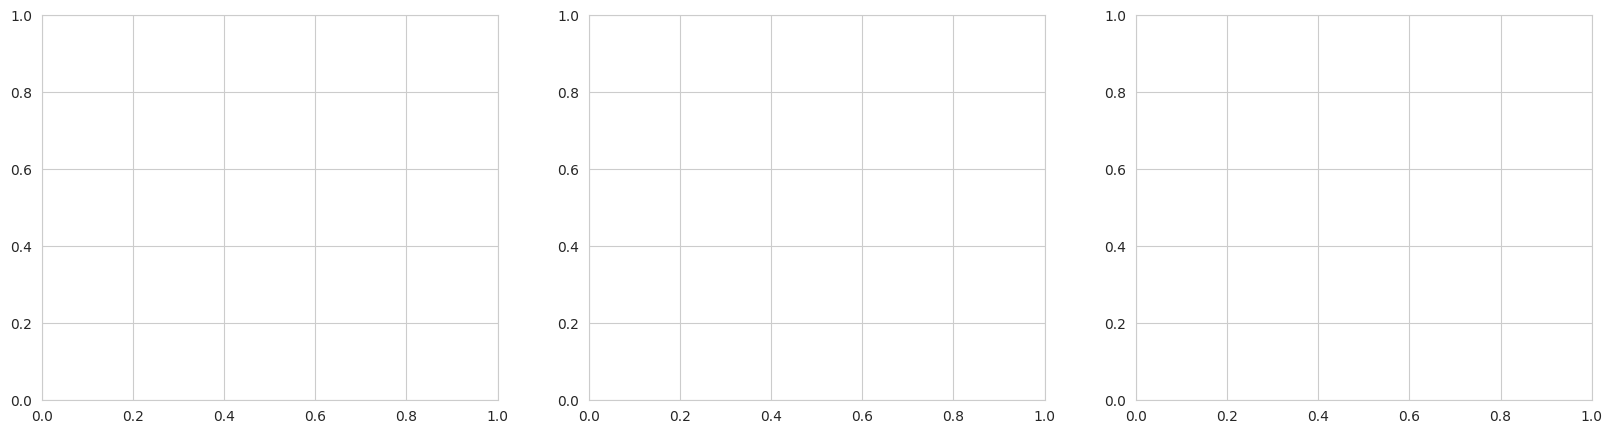

In [112]:

coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

print(coluna)


      
        
        
